In [133]:
#importing packages

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [134]:
# loading data 
data=pd.read_csv('C:/Users/chira/Desktop/data/Pokemon.csv')

# specific information of the columns and values in data
data.info()   

#printing first five values of data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 66.4+ KB


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


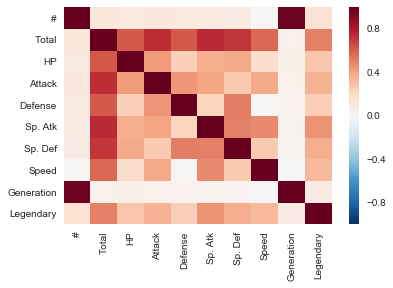

In [135]:
#plotting a heatmap so as to recognize the important features in the data
sns.heatmap(data.corr())

In [136]:
#droppinghte columns that has significant contribution in the predictions
data=data.drop('Type 1',axis=1)
data=data.drop('Type 2',axis=1)

In [137]:
# replacing all the NAN values with last valid observation forward to next valid observation
data=data.fillna(method='pad',axis=1)

# assigning labels to the data
labelEncoder =LabelEncoder()
for col in data.columns:
    data[col] = labelEncoder.fit_transform(data[col])



In [141]:
#dropping the output data from given input
X = data.drop('Legendary', axis=1)

#output required
y = data['Legendary']

#splitting the data into training and testing parts
split=int(0.8*data.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#print (X_train.shape)

(560, 10)


In [142]:
#making decision trees with help of sklearn package
dt = DecisionTreeClassifier(max_depth=10)

#fitting the training data
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [149]:
#checking the accracy score for the testing parts of the data
dt.score(X_test,y_test)


0.97499999999999998